In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


In [25]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


In [26]:
def ucb(mean, n, nj):
  return mean + 0.5*np.sqrt(np.log(n) / nj)


In [27]:
def run_experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(NUM_TRIALS)
  total_plays = 0

  # initialization: play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)
  
  for i in range(NUM_TRIALS):
    j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    # for the plot
    rewards[i] = x
  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print("Estimated win rate for bandit with p = {}: {}".format(b.p, b.p_estimate))

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  return cumulative_average


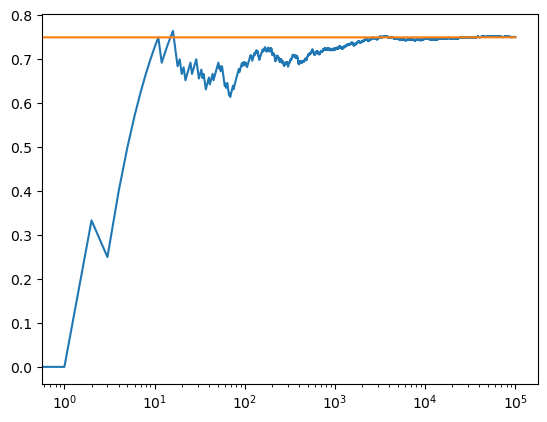

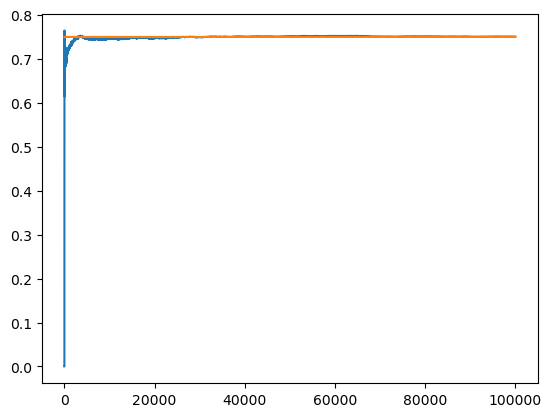

Estimated win rate for bandit with p = 0.2: 0.2857142857142857
Estimated win rate for bandit with p = 0.5: 0.5697674418604647
Estimated win rate for bandit with p = 0.75: 0.7509584296767908
total reward earned: 75074.0
overall win rate: 0.75074
num times selected each bandit: [14.0, 86.0, 99903.0]


In [28]:
if __name__ == '__main__':
  run_experiment()